# Submisi Image Classification Belajar Pengembangan Machine Learning
## Nama : Husni Naufal Zuhdi

## Scoring Criterias

Minimum Criteria
1. Dataset yang akan dipakai bebas, namun minimal memiliki 1000 buah gambar(v)
2. Dataset dibagi menjadi 80% train set dan 20% test set(v)
3. Model harus menggunakan model sequential(v)
4. Model harus menggunakan Conv2D Maxpooling Layer(v)
5. Akurasi pada training dan validation set minimal sebesar 80%(v)
6. Menggunakan Callback(v)
7. Membuat plot terhadap akurasi dan loss model(v)
8. Menulis kode untuk menyimpan model ke dalam format TF-Lite(v)

High Score Criteria
1. Dataset yang digunakan berisi lebih dari 2000 gambar(v)
2. Mengimplementasikan Callback(v)
3. Gambar-gambar pada dataset memiliki resolusi yang tidak seragam(x)

4 Star Criteria
1. Semua ketentuan terpenuhi(v)
2. Dataset memiliki minimal 2000 sampel gambar dan minimal 3 kelas(v)
3. Serta akurasi pada training dan validation set minimal 85%(x)

5 Star Criteria
1. Semua ketentuan terpenuhi(v)
2. Dataset memiliki minimal 10000 gambar(v)
3. Resolusi gambar pada dataset tidak seragam(x)
4. Serta akurasi pada training set dan validation set minimal 92%(x)

## Pre Processing

In [1]:
# The process to acces Kaggle API refer to this article
# https://www.kaggle.com/general/74235
# Install kaggle API
! pip install -q kaggle

In [2]:
# Insert my kaggle json key
from google.colab import files
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
# # Download ASL Alphabet Dataset
# # https://www.kaggle.com/grassknoted/asl-alphabet
! kaggle datasets download -d grassknoted/asl-alphabet

 99% 1.01G/1.03G [00:25<00:00, 36.8MB/s]
100% 1.03G/1.03G [00:25<00:00, 42.4MB/s]


In [4]:
# Unzip the dataset
! unzip /content/asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [5]:
# Import libraries
import os
import pandas as pd
import tensorflow as tf
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# Gain insight from images dataset
alpha = os.listdir('/content/asl_alphabet_train/asl_alphabet_train')
for letter in alpha:
  print(f'total {letter} \t:', len(os.listdir(f'/content/asl_alphabet_train/asl_alphabet_train/{letter}')))

total V 	: 3000
total X 	: 3000
total S 	: 3000
total H 	: 3000
total T 	: 3000
total D 	: 3000
total F 	: 3000
total nothing 	: 3000
total I 	: 3000
total G 	: 3000
total J 	: 3000
total R 	: 3000
total U 	: 3000
total O 	: 3000
total del 	: 3000
total L 	: 3000
total P 	: 3000
total space 	: 3000
total E 	: 3000
total Z 	: 3000
total Q 	: 3000
total B 	: 3000
total N 	: 3000
total M 	: 3000
total Y 	: 3000
total K 	: 3000
total W 	: 3000
total A 	: 3000
total C 	: 3000


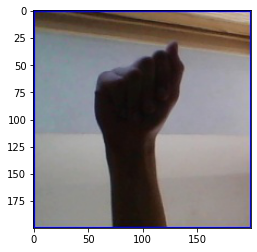

In [7]:
# See sample image
%matplotlib inline
img = image.load_img('/content/asl_alphabet_train/asl_alphabet_train/A/A1.jpg')
imgplot = plt.imshow(img)

In [8]:
# Images Augmentation
train_dir = train_dir = os.path.join('/content/asl_alphabet_train/asl_alphabet_train')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.2)

In [9]:
# Generate Image Dataset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=8,
    class_mode='categorical',
    subset='training')
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


## Build Machine Learning Model

In [10]:
# # Build the Model
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(64, kernel_size=4, strides=1, activation='relu', input_shape=(64, 64, 3)),
#     tf.keras.layers.Conv2D(64, kernel_size=4, strides=2, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Conv2D(128, kernel_size=4, strides=1, activation='relu'),
#     tf.keras.layers.Conv2D(128, kernel_size=4, strides=2, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Conv2D(256, kernel_size=4, strides=1, activation='relu'),
#     tf.keras.layers.Conv2D(256, kernel_size=4, strides=2, activation='relu'),
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(), 
#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(29, activation='softmax')  
# ])
# model.compile(optimizer=tf.optimizers.Adam(),
#               loss='categorical_crossentropy',
#               metrics = ['accuracy'])

In [25]:
# Build the Model
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    # tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(29, activation='softmax')  
])
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [28]:
# Build Callback Class
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.93):
      if(logs.get('val_accuracy')>0.93):
        print("\nModel accuracy and Validation accuracy reach >93%!")
        self.model.stop_training = True
callbacks = myCallback()

## Train and Test Model

In [18]:
# Prepare to use GPU
tf.test.gpu_device_name()

'/device:GPU:0'

In [19]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16634901557233910735, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11344216064
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1108011080536639894
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [29]:
# Train Model
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=50,
                    callbacks=[callbacks],
                    verbose=2)

Epoch 1/50
8700/8700 - 213s - loss: 0.4798 - accuracy: 0.8387 - val_loss: 0.8595 - val_accuracy: 0.7397
Epoch 2/50
8700/8700 - 209s - loss: 0.4233 - accuracy: 0.8564 - val_loss: 0.8695 - val_accuracy: 0.7308
Epoch 3/50
8700/8700 - 212s - loss: 0.3833 - accuracy: 0.8704 - val_loss: 0.8154 - val_accuracy: 0.7576
Epoch 4/50
8700/8700 - 211s - loss: 0.3434 - accuracy: 0.8849 - val_loss: 0.7475 - val_accuracy: 0.7695
Epoch 5/50
8700/8700 - 211s - loss: 0.3257 - accuracy: 0.8899 - val_loss: 0.8822 - val_accuracy: 0.7454
Epoch 6/50
8700/8700 - 209s - loss: 0.3027 - accuracy: 0.8996 - val_loss: 0.7495 - val_accuracy: 0.7645
Epoch 7/50
8700/8700 - 208s - loss: 0.3020 - accuracy: 0.9015 - val_loss: 0.7973 - val_accuracy: 0.7539
Epoch 8/50
8700/8700 - 213s - loss: 0.2796 - accuracy: 0.9072 - val_loss: 0.7653 - val_accuracy: 0.7697
Epoch 9/50
8700/8700 - 211s - loss: 0.2786 - accuracy: 0.9076 - val_loss: 0.7858 - val_accuracy: 0.7614
Epoch 10/50
8700/8700 - 208s - loss: 0.2658 - accuracy: 0.9140 -

In [30]:
# See model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 29, 29, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)         

## Evaluate

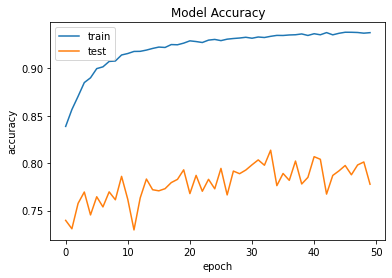

In [31]:
# Plot Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

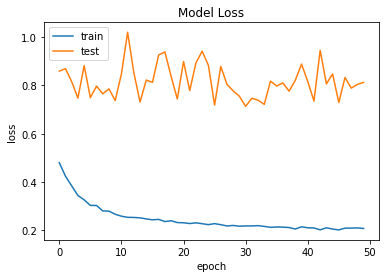

In [32]:
# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Save Model

In [33]:
# Convert Model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpu46syyye/assets


In [34]:
# Save the TFlite Model
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [35]:
# See directory to make sure tflite model already created
! ls -l

total 1075848
drwxr-xr-x 3 root root       4096 Jun 18 13:16 asl_alphabet_test
drwxr-xr-x 3 root root       4096 Jun 18 13:16 asl_alphabet_train
-rw-r--r-- 1 root root 1100887034 Jun 18 13:16 asl-alphabet.zip
-rw-r--r-- 1 root root         67 Jun 18 13:15 kaggle.json
-rw-r--r-- 1 root root     756720 Jun 18 16:28 model.tflite
drwxr-xr-x 1 root root       4096 Jun 15 13:37 sample_data
